# Processing Images
As far as computers are concerned, images are simply numerical data representations. You can use statistical techniques to manipulate and analyze the numerical properties of images.

## Loading and Displaying an Image
Let's start by loading a JPG file and examining its properties. Run the following cell to load and display an image using the **matplotlib.image** library.

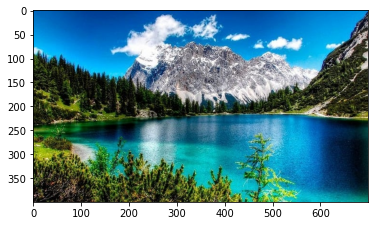

In [3]:
from matplotlib import image as mpimg
from matplotlib import pyplot as plt
import numpy as np

img1 = mpimg.imread('data/image.jpg')
plt.imshow(img1)
# type(img1)

So we can see the file is definitely an image, but note that the data type of the **img1** object is actually a multidimensional numpy array.

Let's take a closer look at the shape of this array:

In [4]:
img1.shape

(400, 700, 3)

The image is actually composed of three "layers, or *channels*, for red, green, and blue (RGB) pixel intensities. Each layer of the image represents 433 x 650 pixels (the dimensions of the image).

Now let's load and display the same image but this time we'll use another popular Python library for working with images - **cv2**.

numpy.ndarray

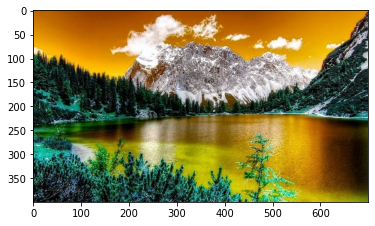

In [5]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

img2 = cv2.imread('data/image.jpg')
plt.imshow(img2)
type(img2)

Once again we've got a multidimensional array; but unless Graeme has joined the Blue Man Group (or possibly the Smurfs), there's something a bit wrong here!

The trouble is that cv2 loads the array of image data with the channels ordered as blue, green, red (BGR) instead of red, green blue (RGB). Let's fix that:

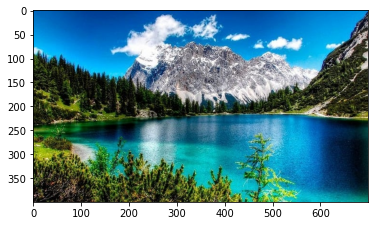

In [6]:
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
plt.imshow(img2)

That's better - now the image is a numpy array with 3 dimensions for red, green, and blue.

There's one more commonly used library for image processing in Python we should consider - **PIL**:

PIL.JpegImagePlugin.JpegImageFile

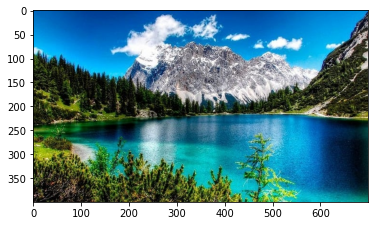

In [8]:
from PIL import Image
import matplotlib.pyplot as plt

img3 = Image.open('data/image.jpg')
plt.imshow(img3)
type(img3)

This time, the data type is a JpegImageFile - not a numpy array. That's great if we only want to manipulate it using PIL methods; but sometimes we'll want to be flexible and process images using mulitple libraries; so we need a consistent format.

Fortunately, it's easy to convert a PIL JpegImageFile to a numpy array:

In [9]:
import numpy as np

img3 = np.array(img3)
img3.shape

(400, 700, 3)

So fundamentally, the common format for image libraries is a numpy array. Using this as the standard format for your image processing workflow, converting to and from other formats as required, is the best way to take advantage of the particular strengths in each library while keeping your code consistent.

You can even save a numpy array in an optimized format, should you need to persist images into storage:

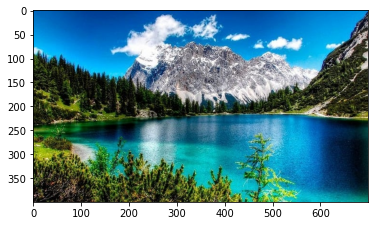

In [10]:
import numpy as np

# Save the image
np.save('data/img.npy', img3)

#Load the image
img3 = np.load('data/img.npy')

plt.imshow(img3)

## Resizing an Image
One of the most common manipulations of an image is to resize it. This can be particularly important when you're preparing multiple images to train a machine learning model, as you'll generally want to ensure that all of your training images have consistent dimensions.

Let's resize our image:

Original size: 700 x 400
New size: 200 x 200


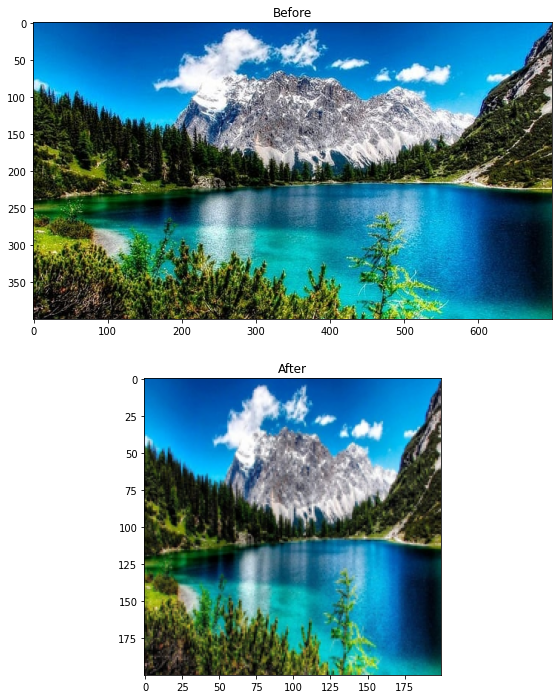

In [11]:
from PIL import Image, ImageOps
import matplotlib.pyplot as plt
%matplotlib inline

# Load the image array into a PIL Image
orig_img = Image.fromarray(img3)

# Get the image size
o_h, o_w = orig_img.size
print('Original size:', o_h, 'x', o_w)

# We'll resize this so it's 200 x 200 using the thumbnail metho
target_size = (200,200)
new_img = orig_img.resize(target_size)
n_h, n_w = new_img.size
print('New size:', n_h, 'x', n_w)

# Show the original and resized images
# Create a figure
fig = plt.figure(figsize=(12, 12))

# Subplot for original image
a=fig.add_subplot(2,1,1)
imgplot = plt.imshow(orig_img)
a.set_title('Before')

# Subplot for resized image
a=fig.add_subplot(2,1,2)
imgplot = plt.imshow(new_img)
a.set_title('After')

plt.show()


Well, that worked; but notice that the image is not scaled. We resized the rectangular image to have square dimensions, and the image is skewed to fill the new size. If we want to resize the image and change its shape without distorting it, we'll need to *scale* the image so that its largest dimension fits our new desired size, and fill out any additional space with some sort of border.

Original size: 700 x 400
Scaled size: 200 x 114
New size: 200 x 200


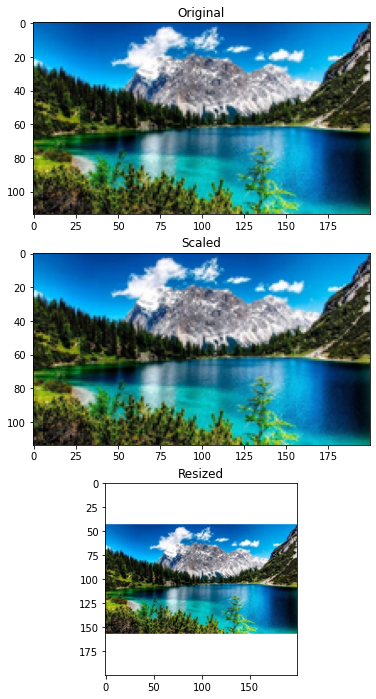

In [12]:
from PIL import Image, ImageOps

orig_img = Image.fromarray(img3)

# Get the image size
orig_height, orig_width = orig_img.size
print('Original size:', orig_height, 'x', orig_width)

# We'll resize this so it's 200 x 200
target_size = (200,200)

# Scale the image to the new size using the thumbnail method
scaled_img = orig_img
scaled_img.thumbnail(target_size, Image.ANTIALIAS)
scaled_height, scaled_width = scaled_img.size
print('Scaled size:', scaled_height, 'x', scaled_width)

# Create a new white image of the target size to be the background
new_img = Image.new("RGB", target_size, (255, 255, 255))

# paste the scaled image into the center of the white background image
new_img.paste(scaled_img, (int((target_size[0] - scaled_img.size[0]) / 2), int((target_size[1] - scaled_img.size[1]) / 2)))
new_height, new_width = new_img.size
print('New size:', new_height, 'x', new_width)

# Show the original and resized images
# Create a figure
fig = plt.figure(figsize=(12, 12))

# Subplot for original image
a=fig.add_subplot(3,1,1)
imgplot = plt.imshow(orig_img)
a.set_title('Original')

# Subplot for scaled image
a=fig.add_subplot(3,1,2)
imgplot = plt.imshow(scaled_img)
a.set_title('Scaled')

# Subplot for resized image
a=fig.add_subplot(3,1,3)
imgplot = plt.imshow(new_img)
a.set_title('Resized')

plt.show()